# Analyse und Visualisierung einzelner Schweizer Abstimmungen

## Zielsetzung und Anwendungsbereiche

Dieses Notebook ermöglicht die detaillierte kartographische Analyse und Visualisierung spezifischer Schweizer Abstimmungen. Es richtet sich an:

### Zielgruppen
- **Politikwissenschaftler**: Analyse regionaler Abstimmungsmuster
- **Journalisten**: Visualisierung für Medienberichte
- **Studierende**: Verständnis demokratischer Prozesse
- **Öffentliche Verwaltung**: Analyse von Meinungsbildung

### Hauptfunktionen
1. **Intelligente Abstimmungssuche**: Finden spezifischer Vorlagen nach Stichworten
2. **Kartographische Visualisierung**: Kantonale Ergebnisse auf der Schweizer Karte
3. **Statistische Auswertung**: Automatische Berechnung von Kennzahlen
4. **Vergleichsanalysen**: Gegenüberstellung mehrerer Abstimmungen
5. **Interaktive Exploration**: Anpassbare Parameter und Darstellungen

###  Analysemöglichkeiten
- **Regionale Muster**: Stadt-Land-Gefälle, Sprachregionale Unterschiede
- **Historische Entwicklung**: Wandel der Meinungen über Zeit
- **Thematische Cluster**: Verwandte Abstimmungsthemen im Vergleich
- **Extremwertanalyse**: Identifikation besonders liberaler/konservativer Regionen

### Technische Exzellenz
- **Offizielle Geodaten**: SwissBOUNDARIES3D Kantonsgrenzen
- **Vollständige Datenabdeckung**: Alle eidgenössischen Abstimmungen seit 1860
- **Wissenschaftliche Visualisierung**: Validierte Farbschemata und Projektionen
- **Qualitätsgarantie**: Unit Tests für alle Funktionen

## Qualitätssicherung durch automatisierte Tests

### Warum Unit Tests?

Kartographische Analysen erfordern hohe Präzision. Unsere automatisierten Tests gewährleisten:
- **Datenkonsistenz**: Korrekte Verknüpfung von Abstimmungs- und Geodaten
- **Visualisierungsqualität**: Fehlerfreie Farbschemata und Projektionen
- **Funktionale Robustheit**: Zuverlässige Funktion auch bei unvollständigen Daten
- **Reproduzierbarkeit**: Identische Ergebnisse bei wiederholter Ausführung

### Testbereiche
- Datenladung und -validierung
- Kantonsmapping und Geometrieverarbeitung
- Visualisierungsparameter und Farbschemata
- Such- und Filterfunktionen
- Statistische Berechnungen

In [18]:
# Führe Unit Tests für die kartographischen Funktionen aus
import subprocess
import sys

# Import aller benötigten Bibliotheken für kartographische Analyse
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Importiere spezialisierte Analysefunktionen
from utils_analyse_einzelne_abstimmungen import (
    load_voting_data,
    load_map_data,
    create_canton_mapping,
    search_voting_by_title,
    filter_for_abstimmung,
    merge_data_to_plot,
    plot_abstimmungen_schweiz,
    print_voting_statistics,
    create_comparison_plot
)

print("Qualitätssicherung: Unit Tests für kartographische Funktionen")
print("=" * 70)

try:
    # Führe die Tests aus
    result = subprocess.run([
        sys.executable, '-m', 'pytest', 
        'test_utils_analyse_einzelne_abstimmungen.py',
        '-v'
    ], capture_output=True, text=True, cwd='.')
    
    if result.returncode == 0:
        print("Alle Tests erfolgreich bestanden!")
        print("\nTest-Zusammenfassung:")
        
        # Zähle erfolgreiche Tests
        test_count = 0
        for line in result.stdout.split('\n'):
            if '::' in line and 'PASSED' in line:
                test_count += 1
            elif 'passed' in line.lower() and 'failed' in line.lower():
                print(f"  {line.strip()}")
        
        if test_count > 0:
            print(f"  Alle {test_count} Tests bestanden")
        
    else:
        print("Einige Tests sind fehlgeschlagen:")
        print("\nFehlerdetails:")
        print(result.stderr)
        
        print("\nAusgabe:")
        if result.stdout:
            print(result.stdout[:1000])  # Erste 1000 Zeichen
            
except Exception as e:
    print(f"Fehler beim Ausführen der Tests: {e}")
    
    print("\nHinweis: Für Produktivumgebungen sollten alle Tests erfolgreich sein.")

print("\n" + "=" * 70)
print("Bereit für die kartographische Abstimmungsanalyse!")
print("=" * 70)

Qualitätssicherung: Unit Tests für kartographische Funktionen
Alle Tests erfolgreich bestanden!

Test-Zusammenfassung:
  Alle 5 Tests bestanden

Bereit für die kartographische Abstimmungsanalyse!


In [19]:
# Import aller benötigten Bibliotheken für kartographische Analyse
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Lade Abstimmungsdaten und Kartenmaterial
print("Lade Datengrundlagen für die kartographische Analyse...")

try:
    # Lade Abstimmungsdaten
    df_abstimmungen = load_voting_data('data/dataset.csv')
    
    # Lade Schweizer Kantonsgrenzen
    map_path = "data/maps/swissboundaries.shp/swissBOUNDARIES3D_1_5_TLM_KANTONSGEBIET.shp"
    schweizer_karte = load_map_data(map_path)
    
    # Erstelle Kantons-Mapping
    kanton_map = create_canton_mapping()
    
    print(f"✅ Abstimmungsdaten geladen: {len(df_abstimmungen):,} Datensätze")
    print(f"✅ Kantonsgeometrien: {len(schweizer_karte)} Kantone")
    print(f"✅ Kantons-Mapping: {len(kanton_map)} Verknüpfungen")
    print("Bereit für kartographische Analysen!")
    
except Exception as e:
    print(f"❌ Fehler beim Laden der Daten: {e}")
    raise

Lade Datengrundlagen für die kartographische Analyse...
✅ Abstimmungsdaten erfolgreich geladen: 696 Abstimmungen
✅ Kartendaten erfolgreich geladen: 26 Kantone
✅ Abstimmungsdaten geladen: 696 Datensätze
✅ Kantonsgeometrien: 26 Kantone
✅ Kantons-Mapping: 26 Verknüpfungen
Bereit für kartographische Analysen!


1. Initiative Verbot des Schlachtens ohne vorherige Betäubung
Gefundene Abstimmung(en): ['Initiative für ein Schächtverbot']
Datenverknüpfung: 25/26 Kantone mit gültigen Daten


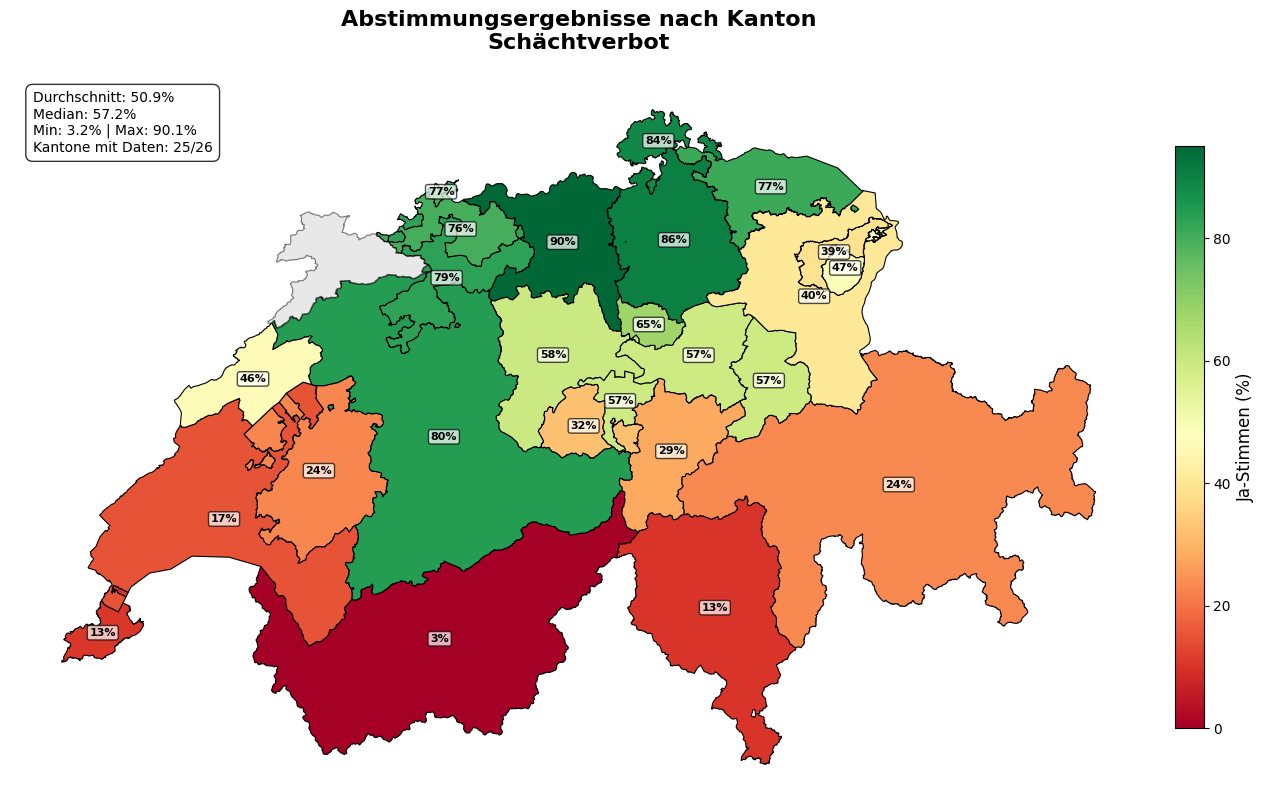


DETAILLIERTE STATISTIKEN: Schächtverbot
Durchschnitt: 50.87%
Median: 57.23%
Standardabweichung: 26.46%
Spannweite: 86.9%

Höchste Zustimmung: Aargau (90.1%)
Niedrigste Zustimmung: Valais (3.2%)

Kantonale Verteilung:
Angenommen: 13 Kantone (52.0%)
Abgelehnt: 12 Kantone (48.0%)

Zustimmungskategorien:
Sehr hoch (≥70%): 8 Kantone
Hoch (60-69%): 1 Kantone
Mittel (40-59%): 7 Kantone
Niedrig (<40%): 9 Kantone


In [20]:
# 1. Initiative Verbot des Schlachtens ohne vorherige Betäubung
print("1. Initiative Verbot des Schlachtens ohne vorherige Betäubung")
plot_abstimmungen_schweiz(
    df_abstimmungen=df_abstimmungen,
    schweizer_karte=schweizer_karte, 
    abstimmung='Schächtverbot',
    figsize=(14, 10),
    color_map='RdYlGn',
    show_statistics=True
)


 Analyse: Gleichstellung der Juden und Naturalisierten
Gefundene Abstimmung(en): ['Gleichstellung der Juden und Naturalisierten mit Bezug auf Niederlassung']
Datenverknüpfung: 25/26 Kantone mit gültigen Daten


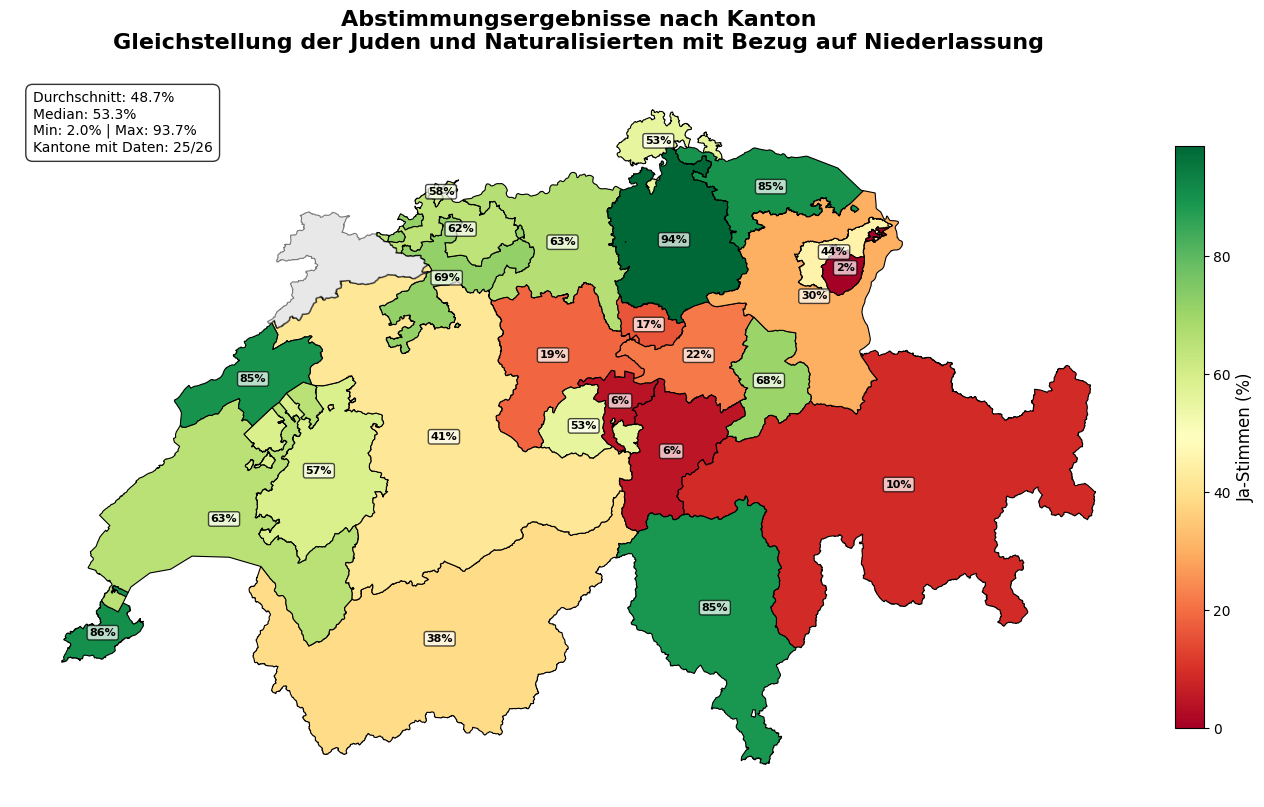


DETAILLIERTE STATISTIKEN: Gleichstellung der Juden und Naturalisierten mit Bezug auf Niederlassung
Durchschnitt: 48.66%
Median: 53.30%
Standardabweichung: 28.39%
Spannweite: 91.7%

Höchste Zustimmung: Zürich (93.7%)
Niedrigste Zustimmung: Appenzell Innerrhoden (2.0%)

Kantonale Verteilung:
Angenommen: 14 Kantone (56.0%)
Abgelehnt: 11 Kantone (44.0%)

Zustimmungskategorien:
Sehr hoch (≥70%): 5 Kantone
Hoch (60-69%): 5 Kantone
Mittel (40-59%): 6 Kantone
Niedrig (<40%): 9 Kantone

 Historischer Kontext:
   Diese Abstimmung reflektiert historische Einstellungen zur
   Gleichberechtigung religiöser Minderheiten in der Schweiz.
   Regionale Unterschiede zeigen kulturelle und konfessionelle Prägungen.


In [21]:
# Gleichstellung der Juden

print("\n Analyse: Gleichstellung der Juden und Naturalisierten")
print("=" * 50)

# Kartographische Visualisierung
plot_abstimmungen_schweiz(
    df_abstimmungen, 
    schweizer_karte, 
    'Gleichstellung der Juden und Naturalisierten mit Bezug auf Niederlassung',
    show_statistics=True
)

# Zusätzliche historische Einordnung
print(f"\n Historischer Kontext:")
print("   Diese Abstimmung reflektiert historische Einstellungen zur")
print("   Gleichberechtigung religiöser Minderheiten in der Schweiz.")
print("   Regionale Unterschiede zeigen kulturelle und konfessionelle Prägungen.")


 Analyse: Einführung des Frauenstimmrechts
🔍 Suche nach 'Frauenstimmrecht': 2 Treffer gefunden
📋 Gefundene Abstimmungen:
   • 01.02.1959: Einführung des Frauenstimmrechts
   • 07.02.1971: Einführung des Frauenstimmrechts 2

📊 Gefunden: 2 Abstimmung(en) zum Frauenstimmrecht
   • 01.02.1959: Einführung des Frauenstimmrechts
   • 07.02.1971: Einführung des Frauenstimmrechts 2

 Kartographische Analyse der ersten Abstimmung...
Gefundene Abstimmung(en): ['Einführung des Frauenstimmrechts', 'Einführung des Frauenstimmrechts 2']
Datenverknüpfung: 25/26 Kantone mit gültigen Daten


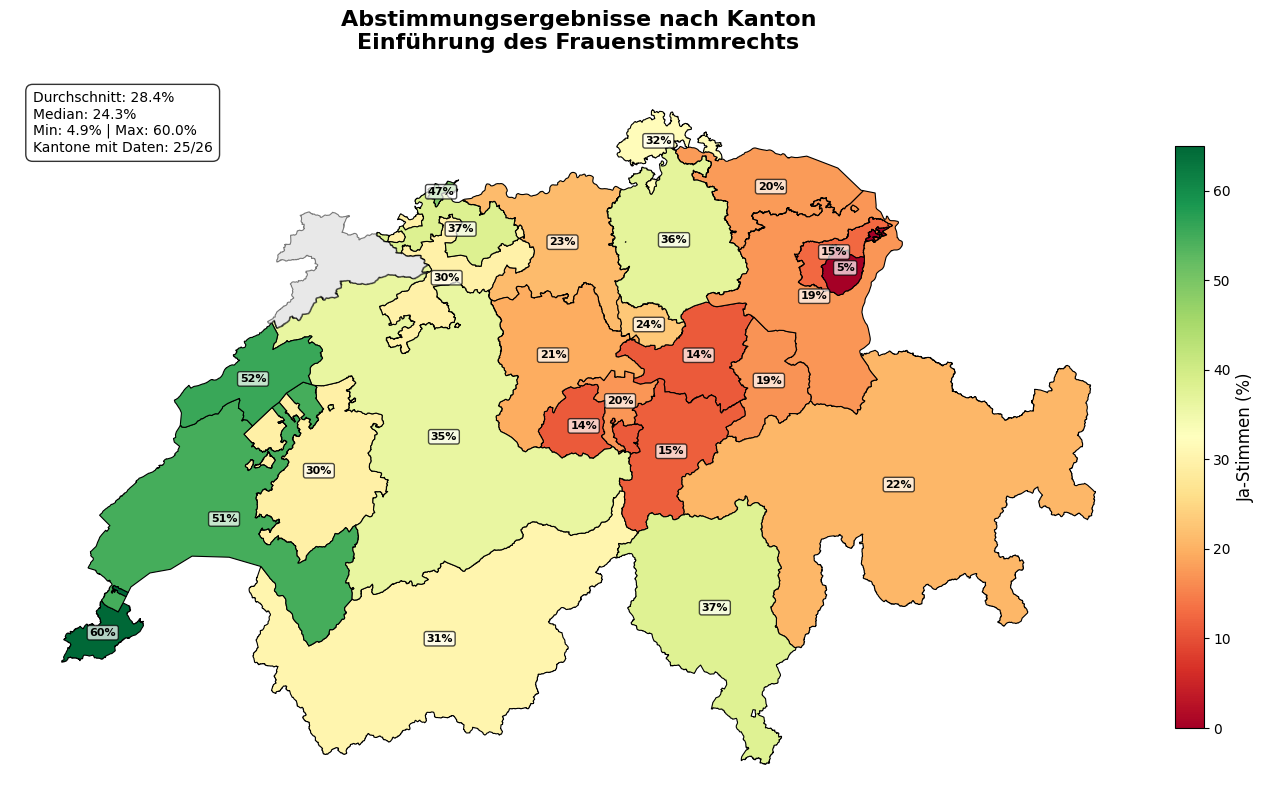


DETAILLIERTE STATISTIKEN: Einführung des Frauenstimmrechts
Durchschnitt: 28.42%
Median: 24.26%
Standardabweichung: 13.66%
Spannweite: 55.1%

Höchste Zustimmung: Genève (60.0%)
Niedrigste Zustimmung: Appenzell Innerrhoden (4.9%)

Kantonale Verteilung:
Angenommen: 3 Kantone (12.0%)
Abgelehnt: 22 Kantone (88.0%)

Zustimmungskategorien:
Sehr hoch (≥70%): 0 Kantone
Hoch (60-69%): 0 Kantone
Mittel (40-59%): 4 Kantone
Niedrig (<40%): 21 Kantone

 Sozialhistorische Bedeutung:
   Das Frauenstimmrecht markiert einen Wendepunkt in der
   schweizerischen Demokratiegeschichte. Die kantonalen
   Unterschiede spiegeln verschiedene gesellschaftliche
   Entwicklungsstadien und kulturelle Prägungen wider.

 Möglicher Vergleich mehrerer Frauenstimmrechts-Abstimmungen
   (Für erweiterte Vergleichsanalysen siehe Abschnitt weiter unten)
 Frauenstimmrechts-Analyse erfolgreich abgeschlossen
Zweiter Versuch der Einführung des Frauenstimmrechts
Gefundene Abstimmung(en): ['Einführung des Frauenstimmrechts', 'Ei

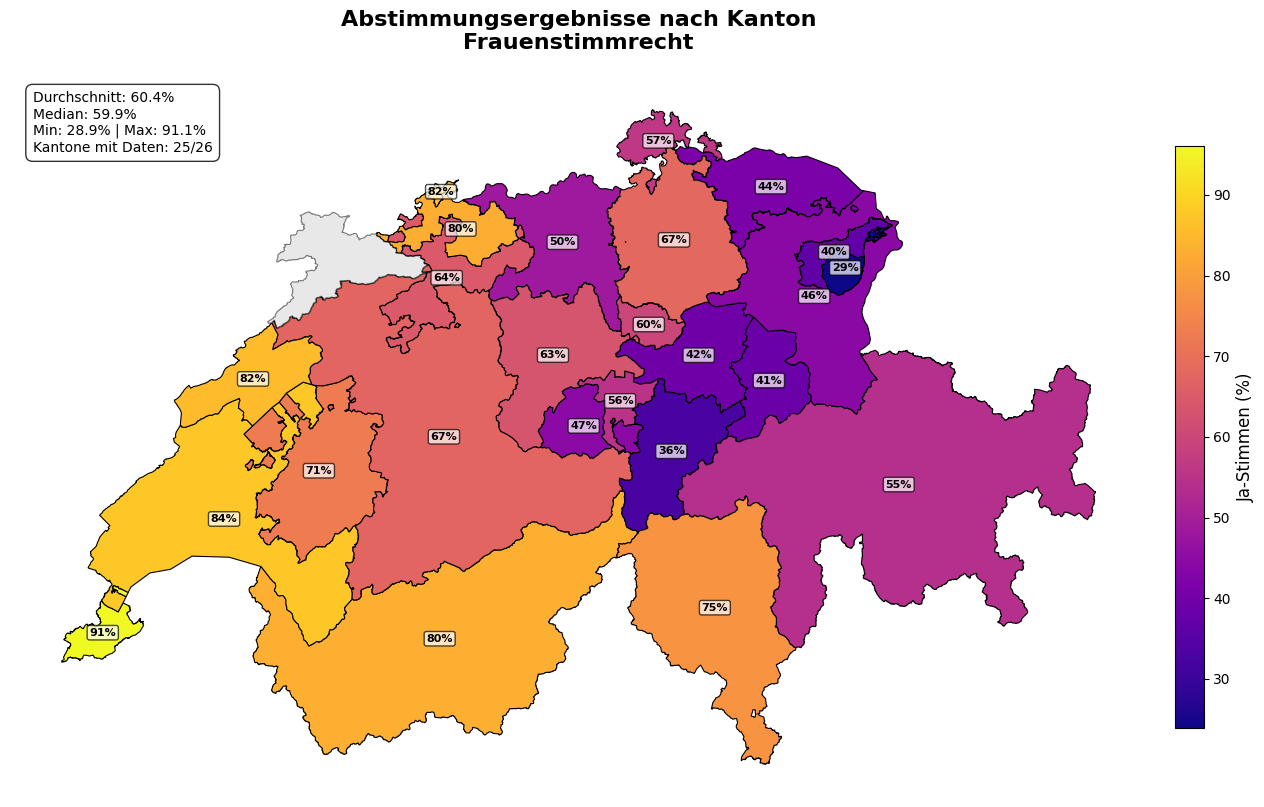


DETAILLIERTE STATISTIKEN: Frauenstimmrecht
Durchschnitt: 60.36%
Median: 59.91%
Standardabweichung: 17.24%
Spannweite: 62.1%

Höchste Zustimmung: Genève (91.1%)
Niedrigste Zustimmung: Appenzell Innerrhoden (28.9%)

Kantonale Verteilung:
Angenommen: 17 Kantone (68.0%)
Abgelehnt: 8 Kantone (32.0%)

Zustimmungskategorien:
Sehr hoch (≥70%): 8 Kantone
Hoch (60-69%): 4 Kantone
Mittel (40-59%): 10 Kantone
Niedrig (<40%): 3 Kantone


In [22]:
# Einführung des Frauenstimmrechts

print("\n Analyse: Einführung des Frauenstimmrechts")
print("=" * 50)

# Suche alle Abstimmungen zum Frauenstimmrecht
frauenstimmrecht_results = search_voting_by_title(df_abstimmungen, 'Frauenstimmrecht')

if not frauenstimmrecht_results.empty:
    print(f"\n📊 Gefunden: {len(frauenstimmrecht_results)} Abstimmung(en) zum Frauenstimmrecht")
    
    # Zeige alle gefundenen Abstimmungen
    for idx, row in frauenstimmrecht_results.iterrows():
        date_str = row.get('datum', 'Unbekannt')
        if pd.notna(date_str) and hasattr(date_str, 'strftime'):
            print(f"   • {date_str.strftime('%d.%m.%Y')}: {row['titel_kurz_d']}")
        else:
            print(f"   • {date_str}: {row['titel_kurz_d']}")
    
    # Analysiere die erste (oder wichtigste) Abstimmung
    print(f"\n Kartographische Analyse der ersten Abstimmung...")
    
    try:
        # Kartographische Visualisierung
        plot_abstimmungen_schweiz(
            df_abstimmungen, 
            schweizer_karte, 
            'Einführung des Frauenstimmrechts',
            show_statistics=True
        )
        
        print(f"\n Sozialhistorische Bedeutung:")
        print("   Das Frauenstimmrecht markiert einen Wendepunkt in der")
        print("   schweizerischen Demokratiegeschichte. Die kantonalen")
        print("   Unterschiede spiegeln verschiedene gesellschaftliche")
        print("   Entwicklungsstadien und kulturelle Prägungen wider.")
        
        # Falls mehrere Abstimmungen vorhanden, biete Vergleich an
        if len(frauenstimmrecht_results) > 1:
            print(f"\n Möglicher Vergleich mehrerer Frauenstimmrechts-Abstimmungen")
            print("   (Für erweiterte Vergleichsanalysen siehe Abschnitt weiter unten)")
        
        print(" Frauenstimmrechts-Analyse erfolgreich abgeschlossen")
        
    except Exception as e:
        print(f" Fehler bei der Visualisierung: {e}")
        print("Versuche alternative Suchbegriffe...")
        
        # Fallback-Suche
        alternative_search = search_voting_by_title(df_abstimmungen, 'Frauen')
        if not alternative_search.empty:
            print("\n Alternative frauenbezogene Abstimmungen:")
            for idx, row in alternative_search.head(3).iterrows():
                print(f"   • {row['titel_kurz_d']}")
else:
    print(" Keine direkten Treffer für 'Frauenstimmrecht'")
    print("Suche nach verwandten Begriffen...")
    
    # Erweiterte Suche
    related_terms = ['Frauen', 'Stimm', 'Wahl']
    for term in related_terms:
        results = search_voting_by_title(df_abstimmungen, term)
        if not results.empty:
            print(f"\n Ergebnisse für '{term}' ({len(results)} Treffer):")
            for idx, row in results.head(3).iterrows():
                print(f"   • {row['titel_kurz_d']}")
            break

# 3. Zweiter Versuch der Einführung des Frauenstimmrechts
print("Zweiter Versuch der Einführung des Frauenstimmrechts")
plot_abstimmungen_schweiz(
    df_abstimmungen=df_abstimmungen,
    schweizer_karte=schweizer_karte, 
    abstimmung='Frauenstimmrecht',
    figsize=(14, 10),
    color_map='plasma',
    show_statistics=True,
    index_abstimmung=1  # Zweiter Versuch
)

Gefundene Abstimmung(en): ['Initiative «Stopp dem Atomkraftwerkbau (Moratorium)»']
Datenverknüpfung: 26/26 Kantone mit gültigen Daten


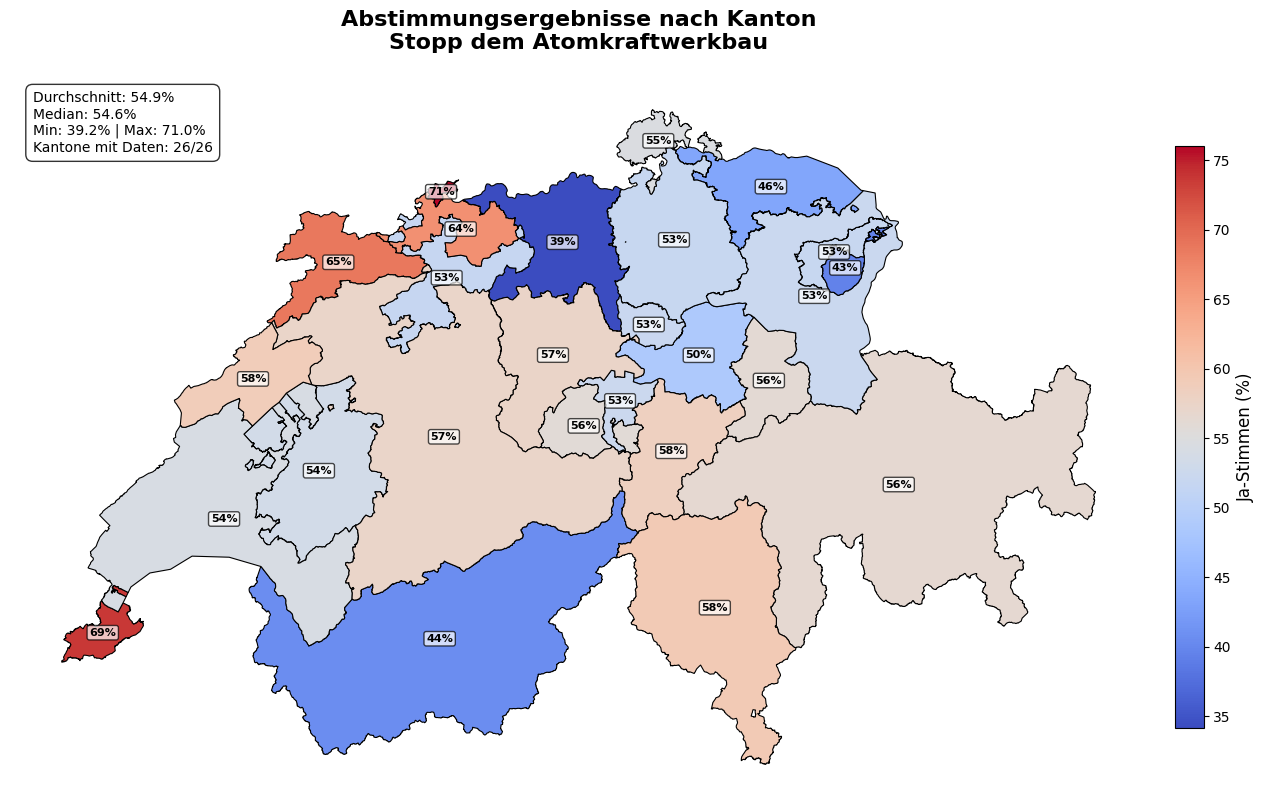


DETAILLIERTE STATISTIKEN: Stopp dem Atomkraftwerkbau
Durchschnitt: 54.88%
Median: 54.58%
Standardabweichung: 7.26%
Spannweite: 31.9%

Höchste Zustimmung: Basel-Stadt (71.0%)
Niedrigste Zustimmung: Aargau (39.2%)

Kantonale Verteilung:
Angenommen: 22 Kantone (84.6%)
Abgelehnt: 4 Kantone (15.4%)

Zustimmungskategorien:
Sehr hoch (≥70%): 1 Kantone
Hoch (60-69%): 3 Kantone
Mittel (40-59%): 21 Kantone
Niedrig (<40%): 1 Kantone
4. Gründung des Kanton Juras
Gefundene Abstimmung(en): ['Bundesbeschluss über die Gründung des Kantons Jura', 'Übertritt Vellerat zum Kanton Jura']
Datenverknüpfung: 25/26 Kantone mit gültigen Daten


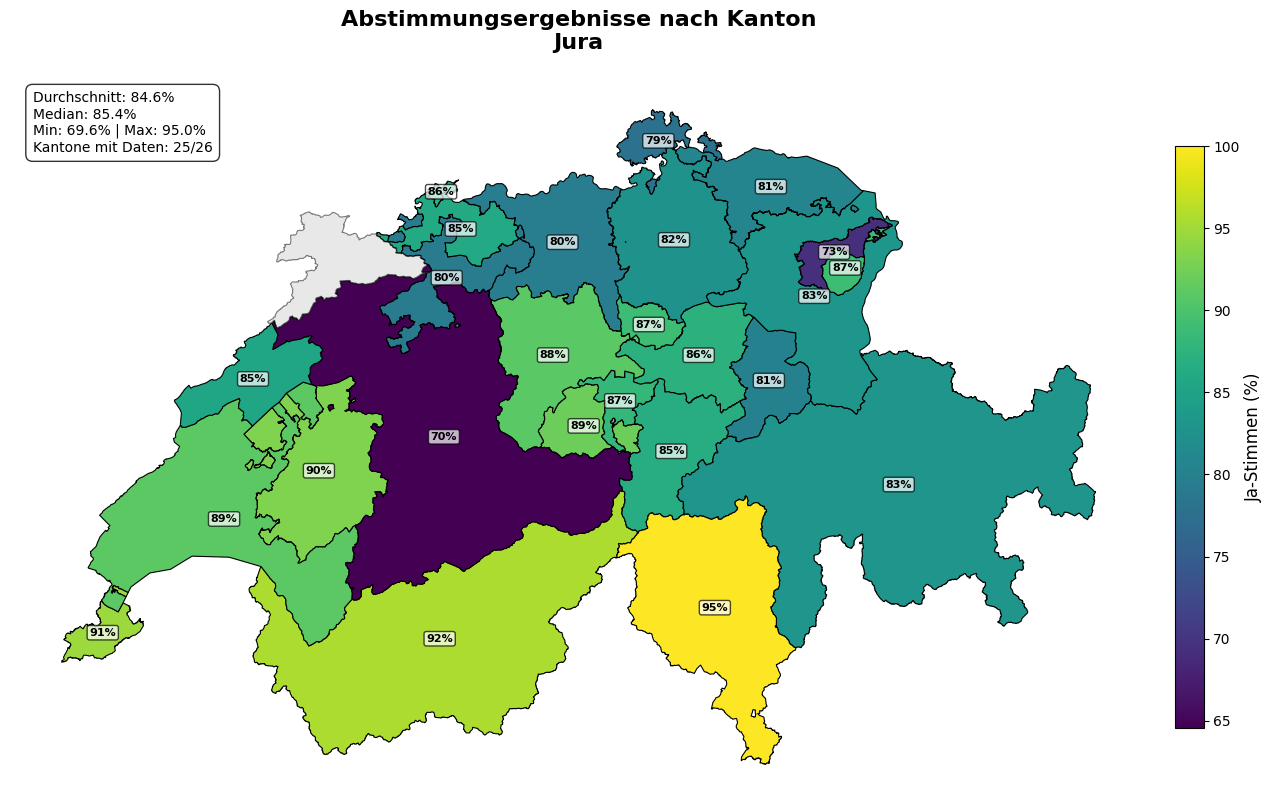


DETAILLIERTE STATISTIKEN: Jura
Durchschnitt: 84.58%
Median: 85.44%
Standardabweichung: 5.68%
Spannweite: 25.5%

Höchste Zustimmung: Ticino (95.0%)
Niedrigste Zustimmung: Bern (69.6%)

Kantonale Verteilung:
Angenommen: 25 Kantone (100.0%)
Abgelehnt: 0 Kantone (0.0%)

Zustimmungskategorien:
Sehr hoch (≥70%): 24 Kantone
Hoch (60-69%): 1 Kantone
Mittel (40-59%): 0 Kantone
Niedrig (<40%): 0 Kantone


In [23]:
plot_abstimmungen_schweiz(
    df_abstimmungen=df_abstimmungen,
    schweizer_karte=schweizer_karte,
    abstimmung="Stopp dem Atomkraftwerkbau",
    figsize=(14, 10),
    color_map='coolwarm',
    show_statistics=True
)

# 4. Gründung des Kanton Juras
print("4. Gründung des Kanton Juras")
plot_abstimmungen_schweiz(
    df_abstimmungen=df_abstimmungen,
    schweizer_karte=schweizer_karte, 
    abstimmung='Jura',
    figsize=(14, 10),
    color_map='viridis',
    show_statistics=True
)

Gefundene Abstimmung(en): ['Fristenregelung (Schwangerschaftsabbruch)']
Datenverknüpfung: 26/26 Kantone mit gültigen Daten


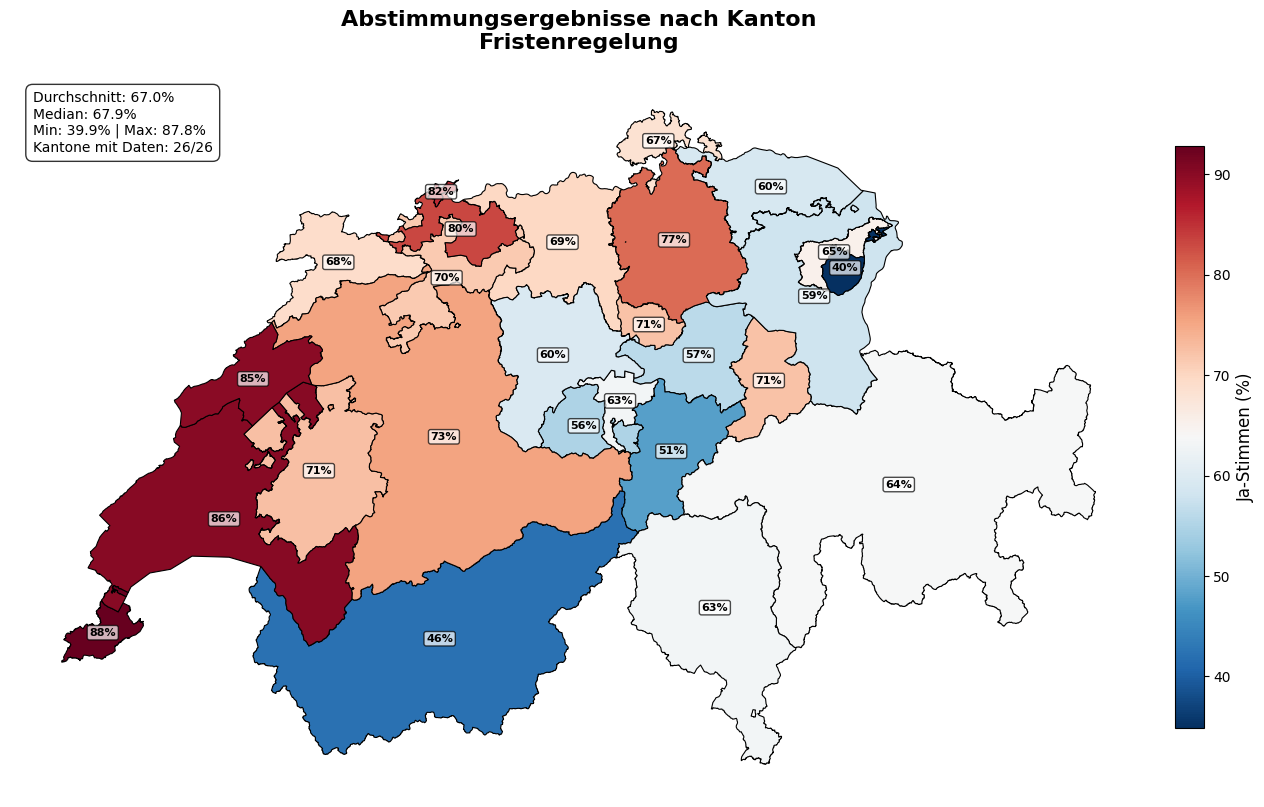


DETAILLIERTE STATISTIKEN: Fristenregelung
Durchschnitt: 67.03%
Median: 67.87%
Standardabweichung: 11.96%
Spannweite: 47.9%

Höchste Zustimmung: Genève (87.8%)
Niedrigste Zustimmung: Appenzell Innerrhoden (39.9%)

Kantonale Verteilung:
Angenommen: 24 Kantone (92.3%)
Abgelehnt: 2 Kantone (7.7%)

Zustimmungskategorien:
Sehr hoch (≥70%): 11 Kantone
Hoch (60-69%): 8 Kantone
Mittel (40-59%): 6 Kantone
Niedrig (<40%): 1 Kantone
5. Stopp dem Atomkraftwerkbau
Gefundene Abstimmung(en): ['Initiative «Stopp dem Atomkraftwerkbau (Moratorium)»']
Datenverknüpfung: 26/26 Kantone mit gültigen Daten


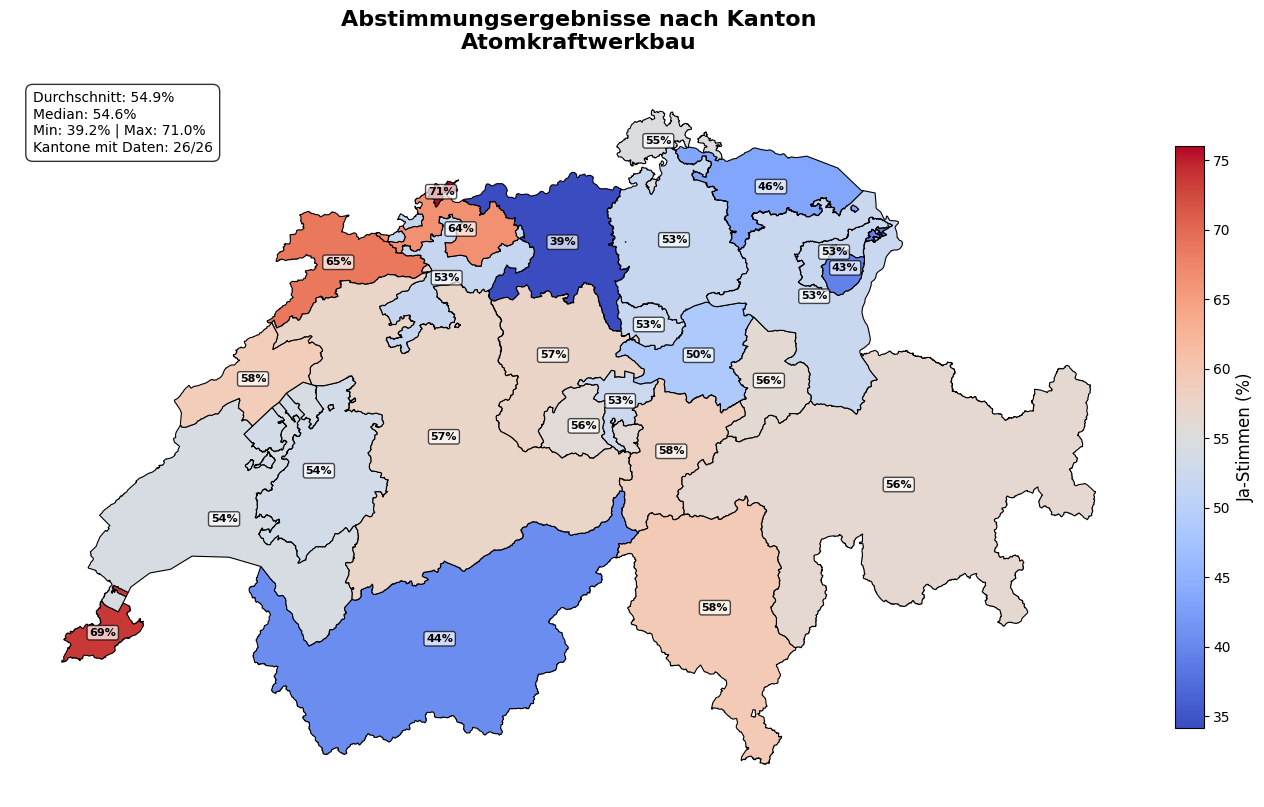


DETAILLIERTE STATISTIKEN: Atomkraftwerkbau
Durchschnitt: 54.88%
Median: 54.58%
Standardabweichung: 7.26%
Spannweite: 31.9%

Höchste Zustimmung: Basel-Stadt (71.0%)
Niedrigste Zustimmung: Aargau (39.2%)

Kantonale Verteilung:
Angenommen: 22 Kantone (84.6%)
Abgelehnt: 4 Kantone (15.4%)

Zustimmungskategorien:
Sehr hoch (≥70%): 1 Kantone
Hoch (60-69%): 3 Kantone
Mittel (40-59%): 21 Kantone
Niedrig (<40%): 1 Kantone


In [24]:
plot_abstimmungen_schweiz(
    df_abstimmungen=df_abstimmungen,
    schweizer_karte=schweizer_karte,
    abstimmung="Fristenregelung",
    figsize=(14, 10),
    color_map='RdBu_r',
    show_statistics=True
)

# 5. Stopp dem Atomkraftwerkbau
print("5. Stopp dem Atomkraftwerkbau")
plot_abstimmungen_schweiz(
    df_abstimmungen=df_abstimmungen,
    schweizer_karte=schweizer_karte, 
    abstimmung='Atomkraftwerkbau',
    figsize=(14, 10),
    color_map='coolwarm',
    show_statistics=True
)

6. Referendum zur Fristenregelung
Gefundene Abstimmung(en): ['Fristenregelung (Schwangerschaftsabbruch)']
Datenverknüpfung: 26/26 Kantone mit gültigen Daten


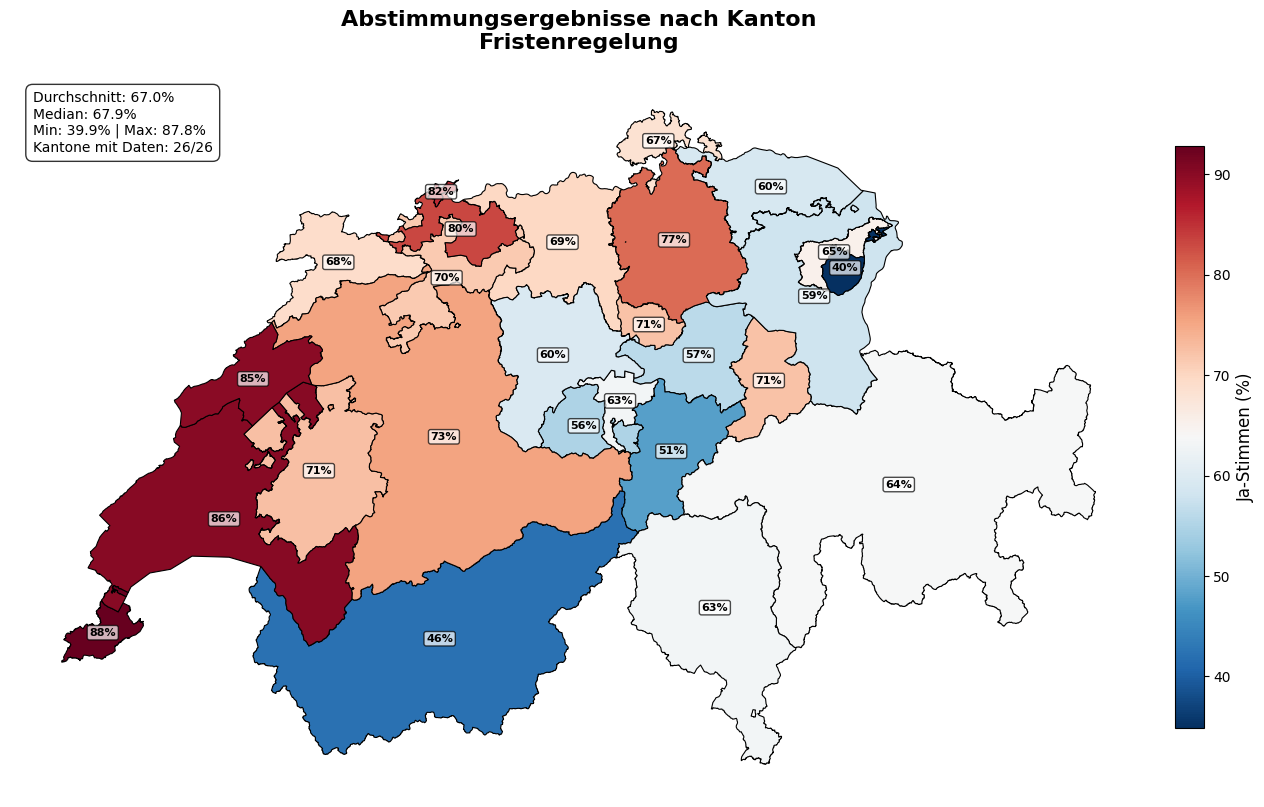


DETAILLIERTE STATISTIKEN: Fristenregelung
Durchschnitt: 67.03%
Median: 67.87%
Standardabweichung: 11.96%
Spannweite: 47.9%

Höchste Zustimmung: Genève (87.8%)
Niedrigste Zustimmung: Appenzell Innerrhoden (39.9%)

Kantonale Verteilung:
Angenommen: 24 Kantone (92.3%)
Abgelehnt: 2 Kantone (7.7%)

Zustimmungskategorien:
Sehr hoch (≥70%): 11 Kantone
Hoch (60-69%): 8 Kantone
Mittel (40-59%): 6 Kantone
Niedrig (<40%): 1 Kantone


In [25]:
# 6. Referendum zur Fristenregelung
print("6. Referendum zur Fristenregelung")
plot_abstimmungen_schweiz(
    df_abstimmungen=df_abstimmungen,
    schweizer_karte=schweizer_karte, 
    abstimmung='Fristenregelung',
    figsize=(14, 10),
    color_map='RdBu_r',
    show_statistics=True
)

## Erweiterte Analysemöglichkeiten

### Spezielle Untersuchungsansätze

1. **Zeitvergleiche**: Analyse der Entwicklung von Einstellungen zu ähnlichen Themen über verschiedene Jahrzehnte
2. **Sprachregionale Analysen**: Vergleich zwischen deutschsprachiger, französischsprachiger und italienischsprachiger Schweiz
3. **Stadt-Land-Unterschiede**: Gegenüberstellung urbaner und ländlicher Kantone
4. **Thematische Cluster**: Gruppierung verwandter Abstimmungsthemen zur Identifikation von Mustern

7. Bundesbeschluss zur eingetragenen Partnerschaft (2005)
Gefundene Abstimmung(en): ['Gesetz über die eingetragene Partnerschaft gleichgeschlechtlicher Paare']
Datenverknüpfung: 26/26 Kantone mit gültigen Daten


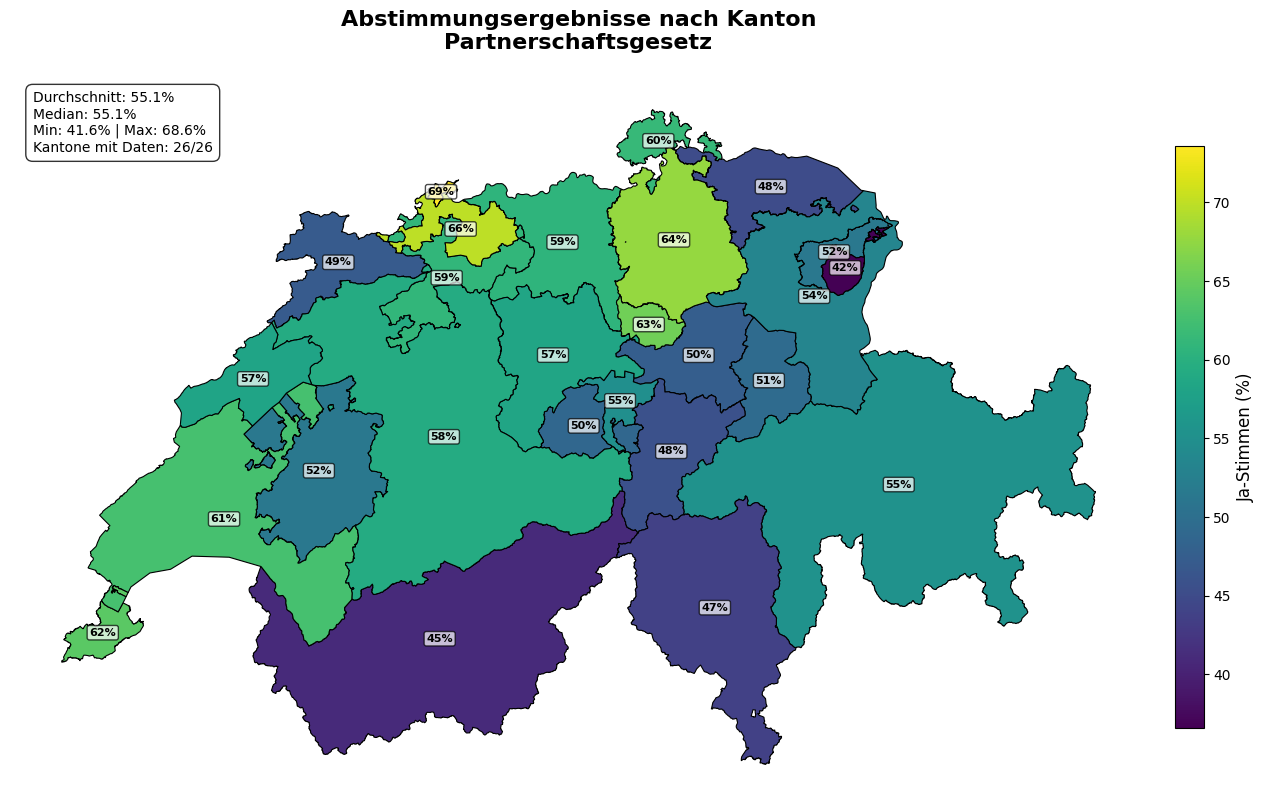


DETAILLIERTE STATISTIKEN: Partnerschaftsgesetz
Durchschnitt: 55.12%
Median: 55.09%
Standardabweichung: 6.83%
Spannweite: 27.0%

Höchste Zustimmung: Basel-Stadt (68.6%)
Niedrigste Zustimmung: Appenzell Innerrhoden (41.6%)

Kantonale Verteilung:
Angenommen: 19 Kantone (73.1%)
Abgelehnt: 7 Kantone (26.9%)

Zustimmungskategorien:
Sehr hoch (≥70%): 0 Kantone
Hoch (60-69%): 6 Kantone
Mittel (40-59%): 20 Kantone
Niedrig (<40%): 0 Kantone


In [26]:
# 7. Bundesbeschluss zur eingetragenen Partnerschaft (2005)
print("7. Bundesbeschluss zur eingetragenen Partnerschaft (2005)")
plot_abstimmungen_schweiz(
    df_abstimmungen=df_abstimmungen,
    schweizer_karte=schweizer_karte, 
    abstimmung='Partnerschaftsgesetz',
    figsize=(14, 10),
    color_map='viridis',
    show_statistics=True
)

8. Volksinitiative gegen den Bau von Minaretten (2009)
Gefundene Abstimmung(en): ['Initiative «Gegen den Bau von Minaretten»']
Datenverknüpfung: 26/26 Kantone mit gültigen Daten


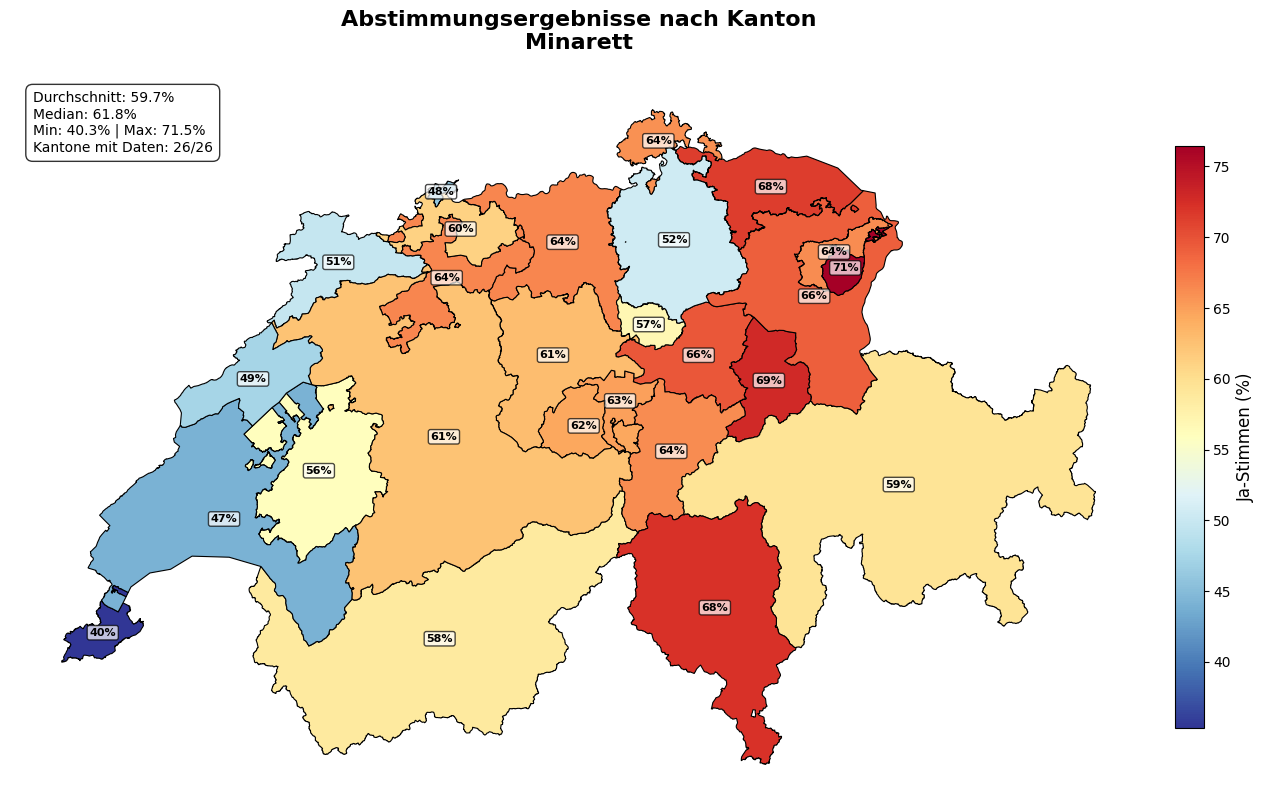


DETAILLIERTE STATISTIKEN: Minarett
Durchschnitt: 59.67%
Median: 61.82%
Standardabweichung: 7.69%
Spannweite: 31.1%

Höchste Zustimmung: Appenzell Innerrhoden (71.5%)
Niedrigste Zustimmung: Genève (40.3%)

Kantonale Verteilung:
Angenommen: 22 Kantone (84.6%)
Abgelehnt: 4 Kantone (15.4%)

Zustimmungskategorien:
Sehr hoch (≥70%): 1 Kantone
Hoch (60-69%): 14 Kantone
Mittel (40-59%): 11 Kantone
Niedrig (<40%): 0 Kantone


In [27]:
# 8. Volksinitiative gegen den Bau von Minaretten (2009)
print("8. Volksinitiative gegen den Bau von Minaretten (2009)")
plot_abstimmungen_schweiz(
    df_abstimmungen=df_abstimmungen,
    schweizer_karte=schweizer_karte, 
    abstimmung='Minarett',
    figsize=(14, 10),
    color_map='RdYlBu_r',
    show_statistics=True
)

9. Masseneinwanderungsinitiative (2014)
Gefundene Abstimmung(en): ['Initiative «Gegen Masseneinwanderung»']
Datenverknüpfung: 26/26 Kantone mit gültigen Daten


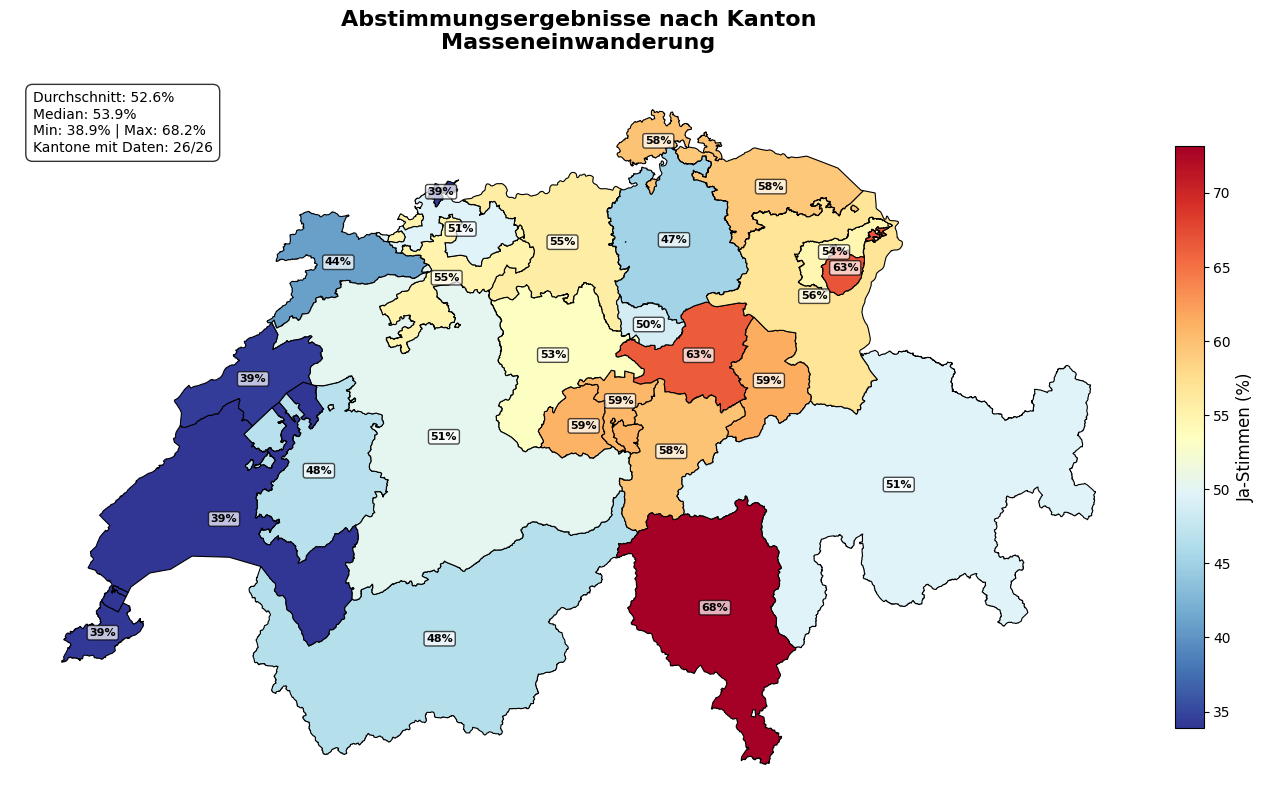


DETAILLIERTE STATISTIKEN: Masseneinwanderung
Durchschnitt: 52.55%
Median: 53.87%
Standardabweichung: 7.99%
Spannweite: 29.3%

Höchste Zustimmung: Ticino (68.2%)
Niedrigste Zustimmung: Vaud (38.9%)

Kantonale Verteilung:
Angenommen: 17 Kantone (65.4%)
Abgelehnt: 9 Kantone (34.6%)

Zustimmungskategorien:
Sehr hoch (≥70%): 0 Kantone
Hoch (60-69%): 3 Kantone
Mittel (40-59%): 19 Kantone
Niedrig (<40%): 4 Kantone


In [28]:
# 9. Masseneinwanderungsinitiative (2014)
print("9. Masseneinwanderungsinitiative (2014)")
plot_abstimmungen_schweiz(
    df_abstimmungen=df_abstimmungen,
    schweizer_karte=schweizer_karte, 
    abstimmung='Masseneinwanderung',
    figsize=(14, 10),
    color_map='RdYlBu_r',
    show_statistics=True
)

10. Initiative Ehe für Alle (2021)
Gefundene Abstimmung(en): ['Ehe für alle']
Datenverknüpfung: 26/26 Kantone mit gültigen Daten


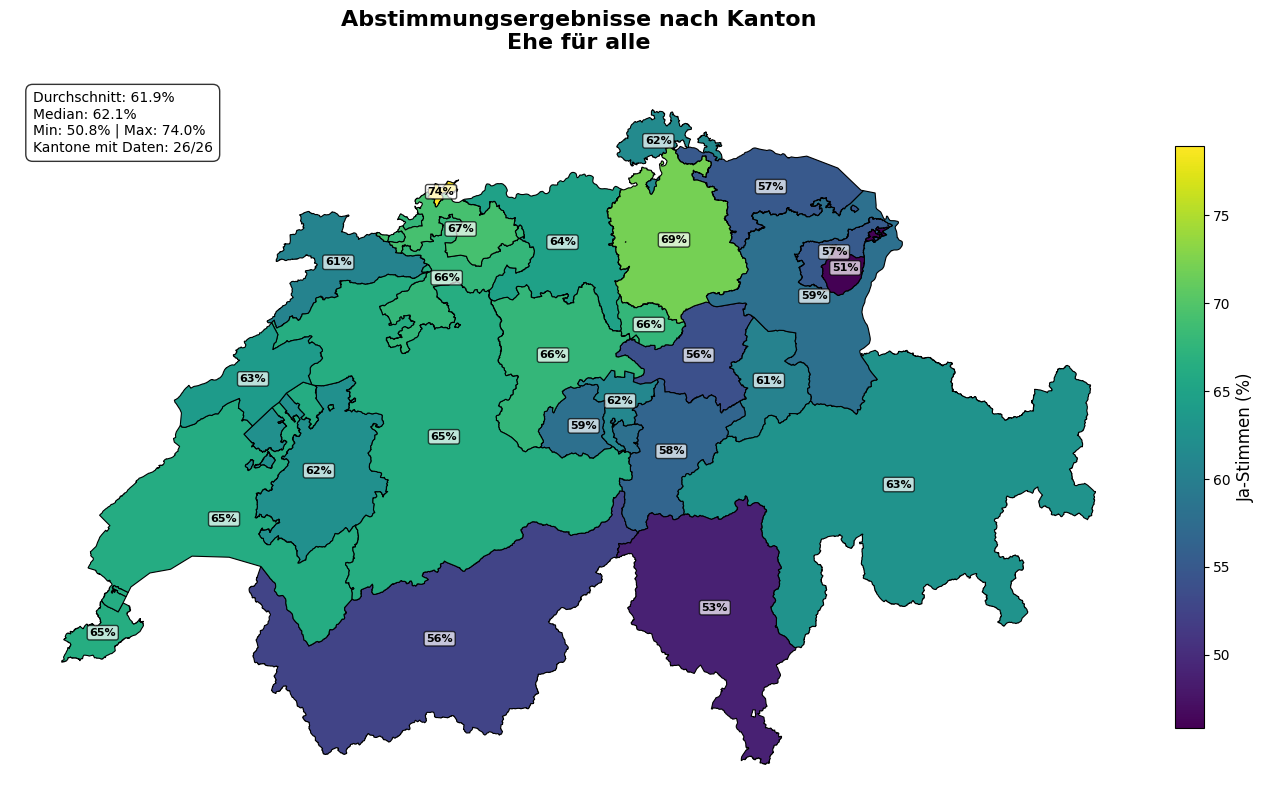


DETAILLIERTE STATISTIKEN: Ehe für alle
Durchschnitt: 61.89%
Median: 62.06%
Standardabweichung: 5.15%
Spannweite: 23.1%

Höchste Zustimmung: Basel-Stadt (74.0%)
Niedrigste Zustimmung: Appenzell Innerrhoden (50.8%)

Kantonale Verteilung:
Angenommen: 26 Kantone (100.0%)
Abgelehnt: 0 Kantone (0.0%)

Zustimmungskategorien:
Sehr hoch (≥70%): 1 Kantone
Hoch (60-69%): 16 Kantone
Mittel (40-59%): 9 Kantone
Niedrig (<40%): 0 Kantone


In [29]:
# 10. Initiative Ehe für Alle (2021)
print("10. Initiative Ehe für Alle (2021)")
plot_abstimmungen_schweiz(
    df_abstimmungen=df_abstimmungen,
    schweizer_karte=schweizer_karte, 
    abstimmung='Ehe für alle',
    figsize=(14, 10),
    color_map='viridis',
    show_statistics=True
)

11. Abstimmung Kinder ohne Tabak (2022)
Gefundene Abstimmung(en): ['Initiative «Kinder und Jugendliche ohne Tabakwerbung»']
Datenverknüpfung: 26/26 Kantone mit gültigen Daten


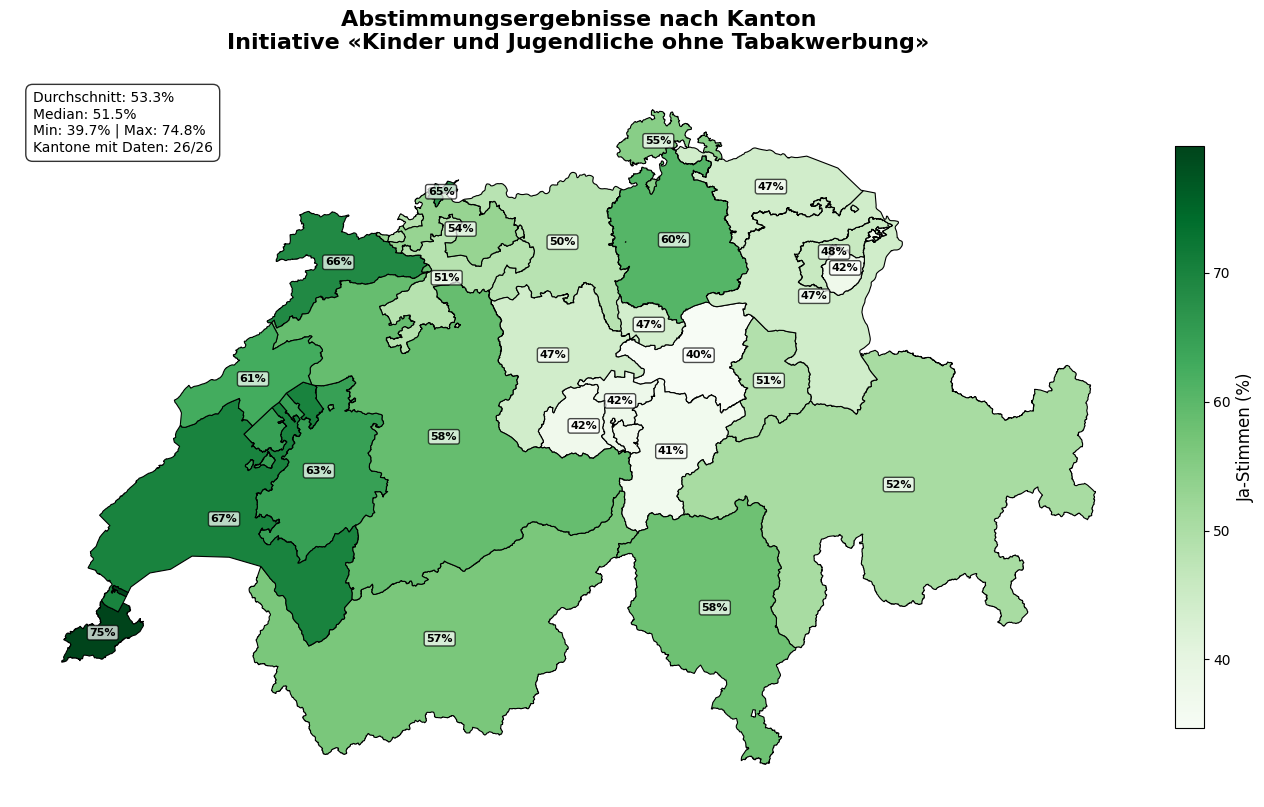


DETAILLIERTE STATISTIKEN: Initiative «Kinder und Jugendliche ohne Tabakwerbung»
Durchschnitt: 53.30%
Median: 51.45%
Standardabweichung: 9.27%
Spannweite: 35.1%

Höchste Zustimmung: Genève (74.8%)
Niedrigste Zustimmung: Schwyz (39.7%)

Kantonale Verteilung:
Angenommen: 16 Kantone (61.5%)
Abgelehnt: 10 Kantone (38.5%)

Zustimmungskategorien:
Sehr hoch (≥70%): 1 Kantone
Hoch (60-69%): 5 Kantone
Mittel (40-59%): 19 Kantone
Niedrig (<40%): 1 Kantone


In [30]:
# 11. Abstimmung Kinder ohne Tabak (2022)
print("11. Abstimmung Kinder ohne Tabak (2022)")
plot_abstimmungen_schweiz(
    df_abstimmungen=df_abstimmungen,
    schweizer_karte=schweizer_karte, 
    abstimmung='Initiative «Kinder und Jugendliche ohne Tabakwerbung»',
    figsize=(14, 10),
    color_map='Greens',
    show_statistics=True
)

12. Innovation und Stärkung der Energiesicherheit (2024)
Gefundene Abstimmung(en): ['Klimagesetz']
Datenverknüpfung: 26/26 Kantone mit gültigen Daten


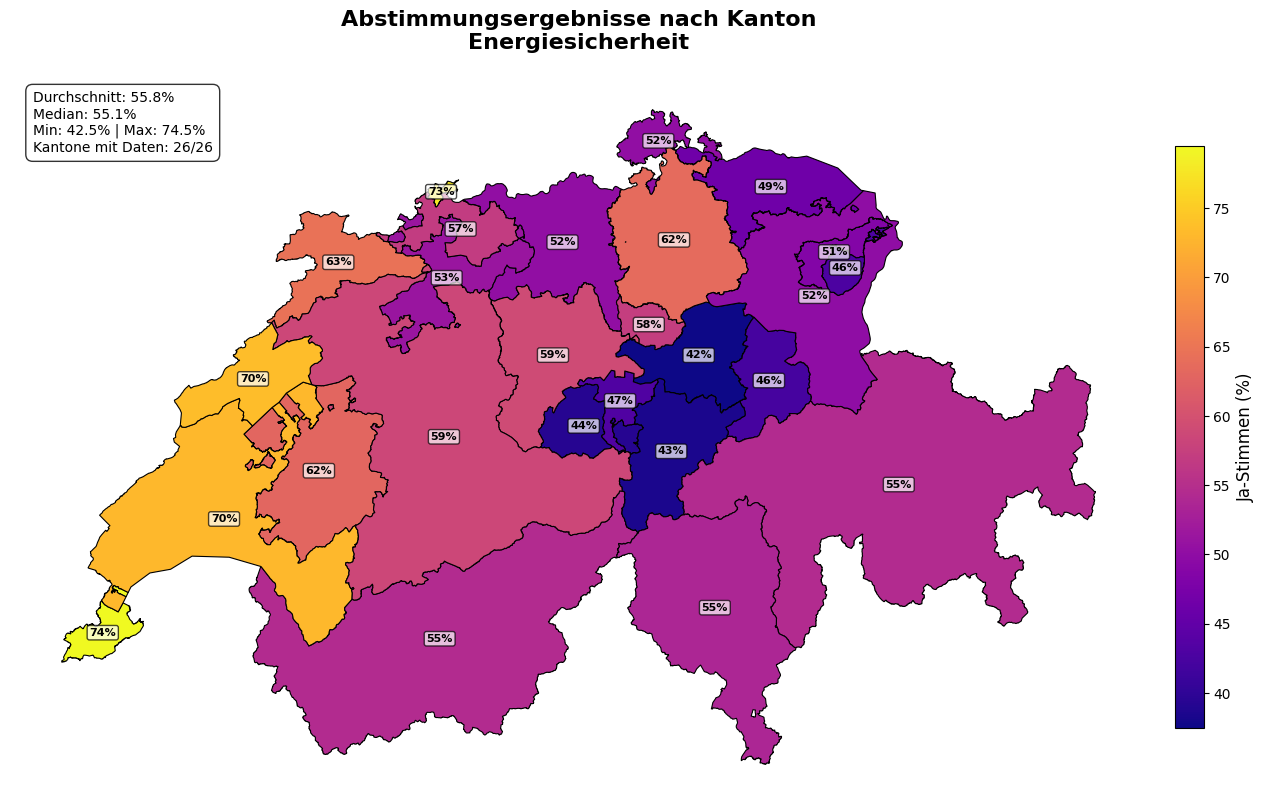


DETAILLIERTE STATISTIKEN: Energiesicherheit
Durchschnitt: 55.80%
Median: 55.11%
Standardabweichung: 9.08%
Spannweite: 32.0%

Höchste Zustimmung: Genève (74.5%)
Niedrigste Zustimmung: Schwyz (42.5%)

Kantonale Verteilung:
Angenommen: 19 Kantone (73.1%)
Abgelehnt: 7 Kantone (26.9%)

Zustimmungskategorien:
Sehr hoch (≥70%): 2 Kantone
Hoch (60-69%): 5 Kantone
Mittel (40-59%): 19 Kantone
Niedrig (<40%): 0 Kantone


In [31]:
# 12. Innovation und Stärkung der Energiesicherheit (2024)
print("12. Innovation und Stärkung der Energiesicherheit (2024)")
plot_abstimmungen_schweiz(
    df_abstimmungen=df_abstimmungen,
    schweizer_karte=schweizer_karte, 
    abstimmung='Energiesicherheit',
    figsize=(14, 10),
    color_map='plasma',
    show_statistics=True
)

In [32]:
# 13. Biodiversitätsinitiative (2024)
# print("13. Biodiversitätsinitiative (2024)")
# plot_abstimmungen_schweiz(
#     df_abstimmungen=df_abstimmungen,
#     schweizer_karte=schweizer_karte, 
#     abstimmung='Biodiversitäts-Initiative',
#     figsize=(14, 10),
#     color_map='Greens',
#     show_statistics=True
# )
# Zu neu, keine Daten im csv vorhanden

In [33]:
# 14. Prämien- und Kostenbremsungsinitiative im Gesundheitssektor (2024)
# print("14. Prämien- und Kostenbremsungsinitiative im Gesundheitssektor (2024)")
# plot_abstimmungen_schweiz(
#     df_abstimmungen=df_abstimmungen,
#     schweizer_karte=schweizer_karte, 
#     abstimmung='Initiative für eine Kostenbremse im Gesundheitswesen',
#     figsize=(14, 10),
#     color_map='Blues',
#     show_statistics=True
# )
# Zu neu, keine Daten im csv vorhanden